In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)，可自行更換可用字體
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
%matplotlib inline

## 讀取圖片

In [2]:
img = cv2.imread("lena.jpg")

In [3]:
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 讀取影片

In [4]:
Cap = cv2.VideoCapture("test.mp4")

In [5]:
#檢查是否有打開成功
if Cap.isOpened():
    open, frame = Cap.read()
else:
    open = False
    

In [6]:
#讀取影片每一幅圖片
while(open):
    open, frame = Cap.read()
    if frame is None:
        break
    if open == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Video', gray)
        if cv2.waitKey(30) & 0xFF == 27:
            break
Cap.release()
cv2.destroyAllWindows()

## ROI

In [7]:
#擷取圖片感興趣區域
roi = img[100:200, 50:200]
cv2.imshow("roi", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Channels Split

In [8]:
#Channels Split
img = cv2.imread('food.jpg')
b,g,r = cv2.split(img) 

In [9]:
print(img.shape)

(429, 640, 3)


In [10]:
print(b.shape)

(429, 640)


In [11]:
cv2.imshow('img', img)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
img_copy = img.copy()
img_copy[:,:,0] = 0  #將B channel設為0
img_copy[:,:,1] = 0  #將G channel設為0
cv2.imshow('g', img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 合併Channels

In [13]:
#合併Channels
img_merge = cv2.merge((r,g,b))

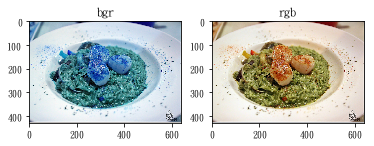

In [14]:
#bgr型式
plt.subplot(121)
plt.title('bgr')
plt.imshow(img) 

#使用matplotlib顯示圖片要轉成rgb
plt.subplot(122)
plt.title('rgb')
plt.imshow(img_merge)

In [15]:
def ToRGB(cv2img):
    b,g,r = cv2.split(cv2img)
    pltImg = cv2.merge((r,g,b))
    return pltImg

## 數值運算

In [16]:
img_1 = cv2.imread('food.jpg')
img_2 = cv2.imread('food2.jpg')

In [17]:
print(img_1.shape)
print(img_2.shape)

(429, 640, 3)
(640, 429, 3)


In [18]:
img_2 = cv2.resize(img_2, (640,429)) #相加，長寬要相同
print(img_2.shape)

(429, 640, 3)


In [19]:
#直接相加(數值超過255，會從0開始加上去)
img_add = img_1 + img_2

#使用cv2.add(數值超過255，就等於255)
img_cv2add  = cv2.add(img_1, img_2)

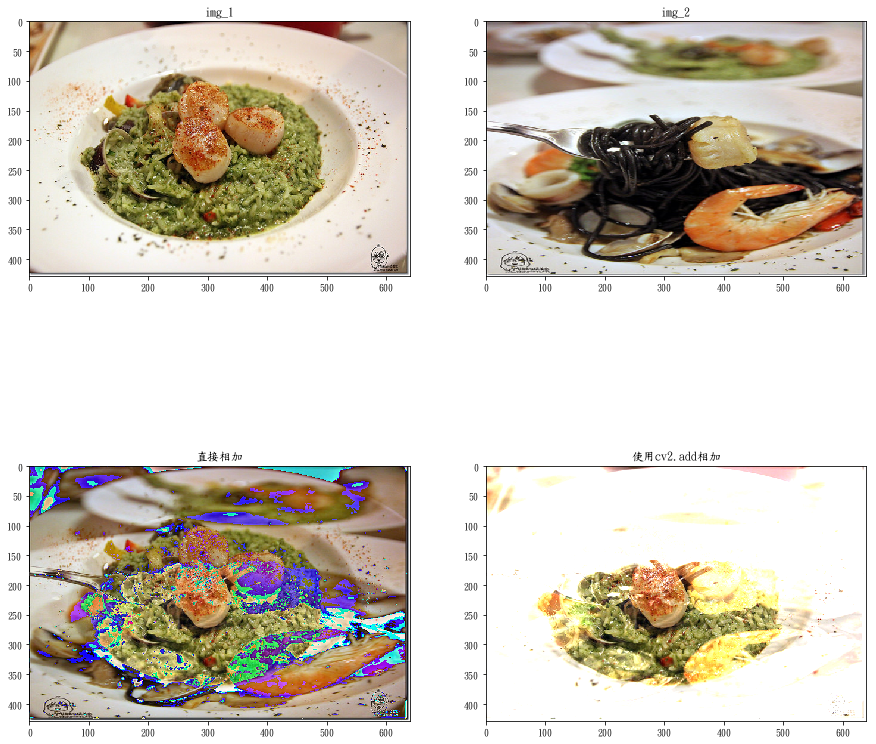

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('img_1')
plt.imshow(ToRGB(img_1))

plt.subplot(222)
plt.title('img_2')
plt.imshow(ToRGB(img_2))

plt.subplot(223)
plt.title('直接相加')
plt.imshow(ToRGB(img_add))

plt.subplot(224)
plt.title('使用cv2.add相加')
plt.imshow(ToRGB(img_cv2add))


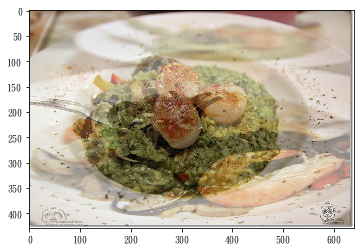

In [21]:
#有權重的相加(addWeighted)
img_addWeight = cv2.addWeighted(img_1, 0.6, img_2, 0.4, 0)
plt.imshow(ToRGB(img_addWeight))